In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("diabetes.csv")

df.head(10)

df.info()

df['Outcome'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Outcome
0    500
1    268
Name: count, dtype: int64

C:\Users\Lance\AppData\Local\Temp\ipykernel_26872\778276659.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['BloodPressure'])
c:\Users\Lance\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Lance\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operat

<Axes: xlabel='Age', ylabel='Density'>

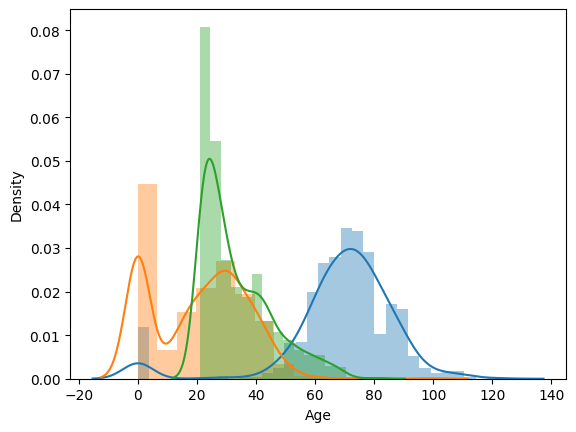

In [3]:
sns.distplot(df['BloodPressure'])

sns.distplot(df['SkinThickness'])

sns.distplot(df['Age'])

In [4]:
from sklearn.model_selection import train_test_split

X = df[['BloodPressure', 'SkinThickness', 'Age']]
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
clf = DecisionTreeClassifier(random_state=0, criterion='entropy', max_depth=2, 
                                                                  min_samples_split=2, 
                                                                  min_samples_leaf=1)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0)

In [6]:
y_preds = clf.predict(X_test)

In [7]:
print("Accuracy %.4f" % accuracy_score(y_test, y_preds))
print("Precision %.4f" % precision_score(y_test, y_preds))
print("Recall %.4f" % recall_score(y_test, y_preds))
print("F1 %.4f" % f1_score(y_test, y_preds))

Accuracy 0.6169
Precision 0.4756
Recall 0.7091
F1 0.5693


[Text(0.5, 0.8333333333333334, 'Age <= 28.5\nentropy = 0.931\nsamples = 614\nvalue = [401, 213]\nclass = No Diabetes'),
 Text(0.25, 0.5, 'SkinThickness <= 31.5\nentropy = 0.694\nsamples = 300\nvalue = [244, 56]\nclass = No Diabetes'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.558\nsamples = 223\nvalue = [194, 29]\nclass = No Diabetes'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.935\nsamples = 77\nvalue = [50, 27]\nclass = No Diabetes'),
 Text(0.75, 0.5, 'Age <= 62.5\nentropy = 1.0\nsamples = 314\nvalue = [157, 157]\nclass = No Diabetes'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.999\nsamples = 298\nvalue = [144, 154]\nclass = Diabetes'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.696\nsamples = 16\nvalue = [13, 3]\nclass = No Diabetes')]

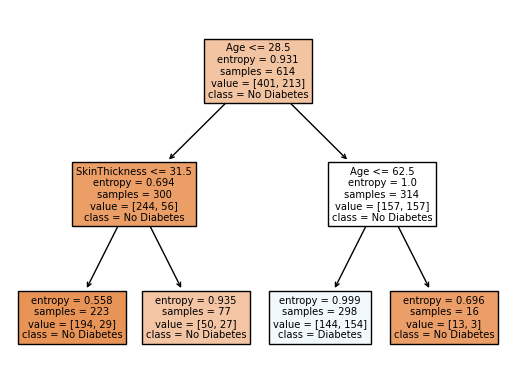

In [9]:
plot_tree(clf, 
          feature_names = list(X.columns),
          class_names = ['No Diabetes', 'Diabetes'],
          filled = True)